In [106]:
import glob
import fitsio
import pylab as pl
import numpy as np
import matplotlib.pyplot   as     plt
import astropy.io.fits     as     fits

from   astropy.table       import Table, join
from   astropy.coordinates import SkyCoord
from   astropy             import units as u
from   desitarget.cmx      import cmx_targetmask
from   desitarget          import targetmask

In [87]:
plt.rcParams['figure.figsize'] = [10, 10]

In [2]:
root  = '/global/cfs/cdirs/desi/spectro/redux/daily/tiles/70502/20200225/'

## GET GAMA G12 TRUTH TABLES

In [3]:
GAMA  = fitsio.read('/project/projectdirs/desi/target/analysis/truth/dr8.0/south/matched/GAMA-DR3-SpecObj-match.fits')
LGAMA = fitsio.read('/project/projectdirs/desi/target/analysis/truth/dr8.0/south/matched/ls-dr8.0-GAMA-DR3-SpecObj-match.fits')

In [4]:
Table(LGAMA)

RELEASE,BRICKID,BRICKNAME,OBJID,TYPE,RA,DEC,RA_IVAR,DEC_IVAR,DCHISQ [5],EBV,FLUX_G,FLUX_R,FLUX_Z,FLUX_W1,FLUX_W2,FLUX_W3,FLUX_W4,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,FLUX_IVAR_W1,FLUX_IVAR_W2,FLUX_IVAR_W3,FLUX_IVAR_W4,MW_TRANSMISSION_G,MW_TRANSMISSION_R,MW_TRANSMISSION_Z,MW_TRANSMISSION_W1,MW_TRANSMISSION_W2,MW_TRANSMISSION_W3,MW_TRANSMISSION_W4,NOBS_G,NOBS_R,NOBS_Z,NOBS_W1,NOBS_W2,NOBS_W3,NOBS_W4,RCHISQ_G,RCHISQ_R,RCHISQ_Z,RCHISQ_W1,RCHISQ_W2,RCHISQ_W3,RCHISQ_W4,FRACFLUX_G,FRACFLUX_R,FRACFLUX_Z,FRACFLUX_W1,FRACFLUX_W2,FRACFLUX_W3,FRACFLUX_W4,FRACMASKED_G,FRACMASKED_R,FRACMASKED_Z,FRACIN_G,FRACIN_R,FRACIN_Z,ANYMASK_G,ANYMASK_R,ANYMASK_Z,ALLMASK_G,ALLMASK_R,ALLMASK_Z,WISEMASK_W1,WISEMASK_W2,PSFSIZE_G,PSFSIZE_R,PSFSIZE_Z,PSFDEPTH_G,PSFDEPTH_R,PSFDEPTH_Z,GALDEPTH_G,GALDEPTH_R,GALDEPTH_Z,PSFDEPTH_W1,PSFDEPTH_W2,WISE_COADD_ID,FRACDEV,FRACDEV_IVAR,SHAPEDEV_R,SHAPEDEV_R_IVAR,SHAPEDEV_E1,SHAPEDEV_E1_IVAR,SHAPEDEV_E2,SHAPEDEV_E2_IVAR,SHAPEEXP_R,SHAPEEXP_R_IVAR,SHAPEEXP_E1,SHAPEEXP_E1_IVAR,SHAPEEXP_E2,SHAPEEXP_E2_IVAR,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,REF_CAT,REF_ID,REF_EPOCH,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_G_MEAN_FLUX_OVER_ERROR,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_BP_MEAN_FLUX_OVER_ERROR,GAIA_PHOT_RP_MEAN_MAG,GAIA_PHOT_RP_MEAN_FLUX_OVER_ERROR,GAIA_ASTROMETRIC_EXCESS_NOISE,GAIA_DUPLICATED_SOURCE,GAIA_PHOT_BP_RP_EXCESS_FACTOR,GAIA_ASTROMETRIC_SIGMA5D_MAX,GAIA_ASTROMETRIC_PARAMS_SOLVED,PARALLAX,PARALLAX_IVAR,PMRA,PMRA_IVAR,PMDEC,PMDEC_IVAR,MASKBITS
int16,int32,bytes8,int32,bytes4,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,int16,int16,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,int16,int16,int16,uint8,uint8,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes8,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes2,int64,float32,float32,float32,float32,float32,float32,float32,float32,bool,float32,float32,uint8,float32,float32,float32,float32,float32,float32,int16
8000,335384,1741p007,1880,EXP,174.00598661852658,0.7209411442642109,6170364000000.0,3612200100000.0,393125.22 .. 499174.62,0.022343107,22.103687,36.531963,50.822514,37.175446,25.24567,30.012196,-66.19626,305.08347,210.70906,27.644505,2.2886844,0.44408834,0.0007721932,1.0681287e-05,0.9359997,0.9564249,0.9753871,0.99622065,0.9976773,0.99950415,0.9998127,5,6,4,120,120,14,14,1.3775369,1.3282869,1.4108723,1.3145102,0.51252604,0.50475776,0.17660692,0.0,0.0,0.0,0.008513172,0.007454667,0.52553546,5.4720254,0.013433383,0.018806715,0.0031869137,0.99952185,0.99955064,0.99926436,0,0,0,0,0,0,0,0,1.5750729,1.623376,1.3023528,1558.4031,842.54285,100.12837,1032.655,560.42255,55.833633,2.6623816,0.52157706,1739p000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.1203763,156861.69,0.26551837,184504.25,0.33154762,195069.23,7.9982896,13.219208,18.39029,7.9982896,13.219208,18.39029,,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0
8000,335384,1741p007,1493,EXP,174.02282152669926,0.7059790888281002,1395997000000.0,983449340000.0,174416.0 .. 249163.11,0.022123419,14.3775625,37.934658,73.70747,100.39731,85.43546,409.38037,1543.9852,230.082,123.84824,12.81705,2.0154252,0.40172595,0.0007455957,1.1111397e-05,0.93660855,0.956844,0.9756261,0.9962578,0.9977001,0.99950904,0.99981457,5,6,4,121,121,15,15,1.6421618,1.6212982,2.6125307,5.39013,1.7833691,0.8033123,0.14229114,0.00014940111,0.00013670656,6.516725e-05,0.02707006,0.024836231,0.088018335,0.91885597,0.0022095016,0.040981863,0.002697632,0.99937946,0.9992431,0.9991144,0,0,0,0,0,0,0,0,1.5750729,1.623376,1.3023528,1558.4031,84

In [5]:
Table(GAMA)

CATAID,GAMA_NAME,IC_FLAG,N_SPEC,N_GAMA_SPEC,DIST,SPECID,SURVEY,SURVEY_CODE,RA,DEC,WMIN,WMAX,Z,NQ,PROB,FILENAME,URL,URL_IMG
int32,bytes23,int16,int16,int16,float32,bytes33,bytes9,int16,float64,float64,float32,float64,float32,int16,float32,bytes67,bytes88,bytes92
6802,GAMAJ113601.43+004315.3,4104,1,1,0.07,G12_Y3_017_187,GAMA,5,174.006,0.72093,3727.71,8857.67,0.05054,4,1.0,/GAMA/dr3/data/spectra/gama/reduced_27/1d/G12_Y3_017_187.fit,http://www.gama-survey.org/dr3/data/spectra/gama/reduced_27/1d/G12_Y3_017_187.fit,http://www.gama-survey.org/dr3/data/spectra/gama/reduced_27/1d/png/G12_Y3_017_187.png
6806,GAMAJ113605.47+004221.3,4104,1,1,0.07,G12_Y1_AN1_238,GAMA,5,174.02279,0.70594,3727.79,8856.73,0.33124,4,1.0,/GAMA/dr3/data/spectra/gama/reduced_27/1d/G12_Y1_AN1_238.fit,http://www.gama-survey.org/dr3/data/spectra/gama/reduced_27/1d/G12_Y1_AN1_238.fit,http://www.gama-survey.org/dr3/data/spectra/gama/reduced_27/1d/png/G12_Y1_AN1_238.png
6808,GAMAJ113624.17+003932.1,4104,1,1,0.08,G12_Y1_AN1_235,GAMA,5,174.10071,0.65891,3727.79,8856.73,0.22936,4,1.0,/GAMA/dr3/data/spectra/gama/reduced_27/1d/G12_Y1_AN1_235.fit,http://www.gama-survey.org/dr3/data/spectra/gama/reduced_27/1d/G12_Y1_AN1_235.fit,http://www.gama-survey.org/dr3/data/spectra/gama/reduced_27/1d/png/G12_Y1_AN1_235.png
6810,GAMAJ113626.18+004814.0,4104,1,1,0.05,G12_Y2_041_164,GAMA,5,174.10908,0.8039,3727.91,8858.93,0.3263,4,1.0,/GAMA/dr3/data/spectra/gama/reduced_27/1d/G12_Y2_041_164.fit,http://www.gama-survey.org/dr3/data/spectra/gama/reduced_27/1d/G12_Y2_041_164.fit,http://www.gama-survey.org/dr3/data/spectra/gama/reduced_27/1d/png/G12_Y2_041_164.png
6813,GAMAJ113615.31+003840.3,4104,1,1,0.05,G12_Y3_017_177,GAMA,5,174.06383,0.64454,3727.71,8857.67,0.48457,4,1.0,/GAMA/dr3/data/spectra/gama/reduced_27/1d/G12_Y3_017_177.fit,http://www.gama-survey.org/dr3/data/spectra/gama/reduced_27/1d/G12_Y3_017_177.fit,http://www.gama-survey.org/dr3/data/spectra/gama/reduced_27/1d/png/G12_Y3_017_177.png
6816,GAMAJ113604.55+003956.8,4104,1,1,0.04,G12_Y3_017_182,GAMA,5,174.01896,0.6658,3727.71,8857.67,0.07641,4,0.986,/GAMA/dr3/data/spectra/gama/reduced_27/1d/G12_Y3_017_182.fit,http://www.gama-survey.org/dr3/data/spectra/gama/reduced_27/1d/G12_Y3_017_182.fit,http://www.gama-survey.org/dr3/data/spectra/gama/reduced_27/1d/png/G12_Y3_017_182.png
6820,GAMAJ113608.43+004721.4,4104,3,3,0.05,G12_Y3_033_174,GAMA,5,174.03512,0.78928,3726.83,8857.89,0.4141,4,0.999,/GAMA/dr3/data/spectra/gama/reduced_27/1d/G12_Y3_033_174.fit,http://www.gama-survey.org/dr3/data/spectra/gama/reduced_27/1d/G12_Y3_033_174.fit,http://www.gama-survey.org/dr3/data/spectra/gama/reduced_27/1d/png/G12_Y3_033_174.png
6821,GAMAJ113636.75+004855.5,4104,1,1,0.11,G12_Y1_AN1_254,GAMA,5,174.15312,0.81543,3727.79,8856.73,0.00382,4,0.998,/GAMA/dr3/data/spectra/gama/reduced_27/1d/G12_Y1_AN1_254.fit,http://www.gama-survey.org/dr3/data/spectra/gama/reduced_27/1d/G12_Y1_AN1_254.fit,http://www.gama-survey.org/dr3/data/spectra/gama/reduced_27/1d/png/G12_Y1_AN1_254.png
6826,GAMAJ113644.38+004232.5,4104,3,0,0.01,317651685860206592,SDSS,1,174.18493,0.70906,3801.89,9204.5,0.07275,5,0.0,/GAMA/dr3/data/spectra/sdss/spec-0282-51658-0538.fit,http://www.gama-survey.org/dr3/data/spectra/sdss/spec-0282-51658-0538.fit,http://www.gama-survey.org/dr3/data/spectra/sdss/png/spec-0282-51658-0538.png


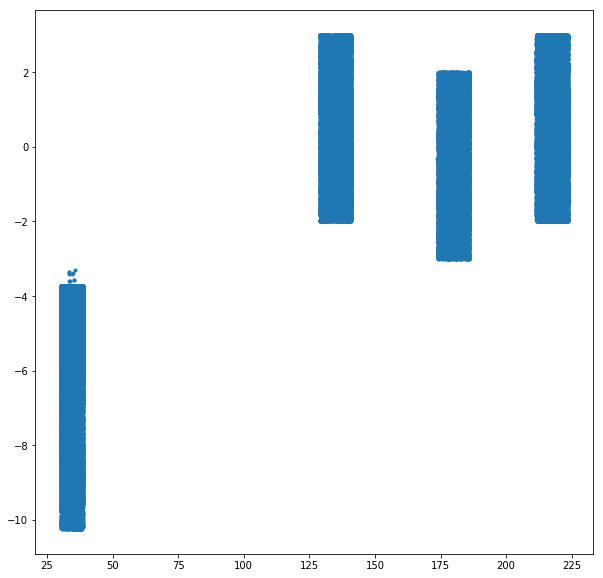

In [92]:
pl.plot(GAMA['RA'], GAMA['DEC'], '.')

In [93]:
##  Restrict to G12
isin   = (GAMA['RA'] < 200.) & (GAMA['RA'] > 150.)

G12    =  GAMA[isin]
LG12   =  LGAMA[isin]

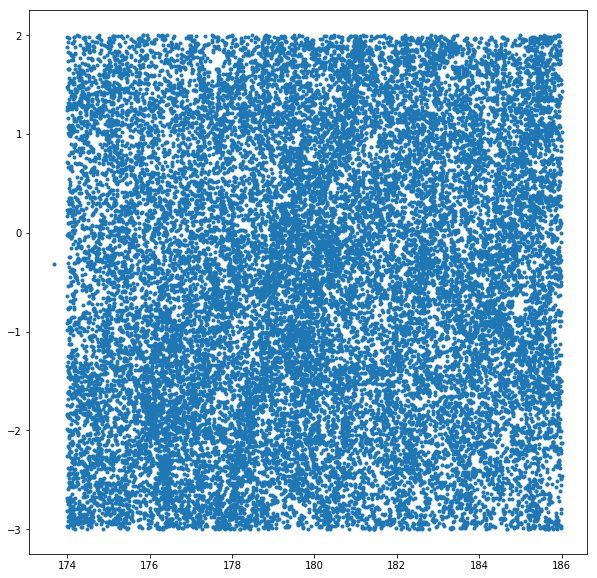

In [94]:
pl.plot(G12['RA'], G12['DEC'], '.')

In [9]:
# ALL EXPIDS
expids = glob.glob('/global/cfs/cdirs/desi/spectro/redux/daily/exposures/20200225/*')
expids = [x.split('/')[-1] for x in expids]

In [10]:
# BGS EXPIDS
bgs_expids = ['00052112', '00052113', '00052114', '00052115', '00052116'] 

##  GET COORDINATES FILE FOR FIBER REACH ERRORS

In [11]:
# Coordinates
# ls /global/cfs/cdirs/desi/spectro/data/20200225/*/coordinates-*

fp     = {}
fas    = {}
coors  = {}

for _ in bgs_expids:
  coors[_] = fitsio.read('/global/cfs/cdirs/desi/spectro/data/20200225/{}/coordinates-{}.fits'.format(_,_))

  fas[_]   = fitsio.read('/global/cfs/cdirs/desi/spectro/data/20200225/{}/fiberassign-070502.fits'.format(_))
    
  fp[_]    = join(Table(fas[_]), Table(coors[_]), keys=['TARGET_RA', 'TARGET_DEC'])
  fp[_].sort('TARGETID')

In [12]:
len(fas['00052112']), len(coors['00052112'])

(5000, 5126)

In [13]:
# https://desi.lbl.gov/trac/wiki/FPS/PositionerFlags
Table(coors['00052112'])[:10]

PETAL_LOC,DEVICE_LOC,CONVERGED,TARGET_RA,TARGET_DEC,FIBERASSIGN_X,FIBERASSIGN_Y,REQ_Q,REQ_S,REQ_X,REQ_Y,EXP_Q_0,EXP_S_0,FLAGS_EXP_0,EXP_X_0,EXP_Y_0,FVC_X_0,FVC_Y_0,FLAGS_FVC_0,CNT_X_0,CNT_Y_0,FLAGS_CNT_0,CNT_MAG_0,CNT_ERR_0,DX_0,DY_0,FPA_X_0,FPA_Y_0,FLAGS_COR_0,REQ_X_0,REQ_Y_0,OFFSET_0,EXP_Q_1,EXP_S_1,FLAGS_EXP_1,EXP_X_1,EXP_Y_1,FVC_X_1,FVC_Y_1,FLAGS_FVC_1,CNT_X_1,CNT_Y_1,FLAGS_CNT_1,CNT_MAG_1,CNT_ERR_1,DX_1,DY_1,FPA_X_1,FPA_Y_1,FLAGS_COR_1,REQ_X_1,REQ_Y_1,OFFSET_1,EXP_Q_2,EXP_S_2,FLAGS_EXP_2,EXP_X_2,EXP_Y_2,FVC_X_2,FVC_Y_2,FLAGS_FVC_2,CNT_X_2,CNT_Y_2,FLAGS_CNT_2,CNT_MAG_2,CNT_ERR_2,DX_2,DY_2,FPA_X_2,FPA_Y_2,FLAGS_COR_2,REQ_X_2,REQ_Y_2,OFFSET_2
int64,int64,int64,float64,float64,float32,float32,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,int64,float64,float64,int64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,int64,float64,float64,int64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,int64,float64,float64,int64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64
0,0,0,180.00335405788294,-0.621495582398852,-0.8161547,-29.559782,268.433,29.5122,-0.807,-29.501,-91.56700482678802,29.51219500358265,4,-0.8070352584048036,-29.500984248411754,-32.748,-128.427,4,-59.96300000000019,-140.24800000000005,69,12.591,0.001,0.015,-0.027,-0.822,-29.506,69,-0.8069999999999999,-29.533,0.030886890422961,-91.56524613771153,29.544195983155205,4,-0.8070038284804425,-29.532997469859243,-32.75,-128.656,4,-59.88599999999997,-140.56100000000015,69,12.577,0.001,-0.012,-0.001,-0.8,-29.534,69,-0.812,-29.535,0.012041594578792296,-91.57482354534343,29.546339324256955,4,-0.8119993762986774,-29.535004653638484,-32.714,-128.671,4,-59.746999999999844,-140.4920000000002,69,12.584,0.001,0.012,0.01,-0.816,-29.535,69,-0.8039999999999999,-29.525,0.015620499351813309
0,1,0,180.0231341950373,-0.6507315506445961,-5.6288614,-36.67601,261.285,37.0345,-5.612,-36.607,-98.7149953887083,37.034501344861596,4,-5.611397695467422,-36.6065698348362,1.273,-179.515,4,-25.923999999999978,-191.288,69,12.634,0.001,0.011,-0.03,-5.625,-36.61,69,-5.614,-36.64,0.03195309061734092,-98.71115036179455,37.06794462446719,4,-5.614006023842825,-36.64000288491379,1.29,-179.755,4,-25.824999999999818,-191.5949999999998,69,12.661,0.001,-0.012,-0.005,-5.605,-36.637,69,-5.617,-36.642,0.013000000000000001,-98.71525523655997,37.07037515938638,4,-5.616999304401997,-36.64200298650849,1.312,-179.769,4,-25.69399999999996,-191.5540000000001,69,12.639,0.001,0.011,0.009,-5.62,-36.642,69,-5.609,-36.633,0.014212670403551895
0,2,0,179.98077758344465,-0.6404921089237555,4.6765695,-34.18345,277.805,34.438,4.677,-34.119,-82.19501441928672,34.43800188244677,4,4.676704446560656,-34.11869512226655,-72.248,-161.18,4,-99.39699999999993,-173.08199999999988,69,12.613,0.001,0.021,-0.02,4.657,-34.132,69,4.678,-34.152,0.029,-82.20039154731428,34.47117524482999,4,4.678004238925492,-34.15199951756062,-72.259,-161.419,4,-99.36400000000003,-173.3159999999998,69,12.707,0.001,-0.012,-0.005,4.686,-34.148,69,4.674,-34.153000000000006,0.013000000000000001,-82.20720975790012,34.47162141788797,4,4.674000605712774,-34.15299800079695,-72.23,-161.426,4,-99.23799999999983,-173.2779999999998,69,12.622,0.001,0.011,0.009,4.671,-34.153,69,4.682,-34.144,0.014212670403551895
0,3,0,180.03445477650894,-0.7029945365211852,-8.385128,-49.404007,260.375,50.0225,-8.363,-49.318,-99.62499880318101,50.02250549837621,4,-8.363566359348193,-49.31750361890276,20.294,-270.542,4,-6.80600000000004,-282.3879999999999,69,12.585,0.001,0.016,-0.019,-8.382,-49.336,69,-8.366,-49.355,0.02483948469674844,-99.62056926901467,50.05988582029831,4,-8.366000374457617,-49.35500274069925,20.309,-270.81,4,-6.719000000000051,-282.6080000000002,69,12.599,0.001,-0.01,-0.006,-8.36,-49.35,69,-8.37,-49.356,0.0116619037896906,-99.62488429242188,50.0615384

In [14]:
# np.unique(coors['00052112']['PETAL_LOC'], return_counts=True)

In [15]:
# np.unique(coors['00052112']['DEVICE_LOC'], return_counts=True)

In [16]:
Table(fas['00052112'])[:10]

TARGETID,PETAL_LOC,DEVICE_LOC,LOCATION,FIBER,FIBERSTATUS,TARGET_RA,TARGET_DEC,PMRA,PMDEC,PMRA_IVAR,PMDEC_IVAR,REF_EPOCH,LAMBDA_REF,FA_TARGET,FA_TYPE,OBJTYPE,FIBERASSIGN_X,FIBERASSIGN_Y,NUMTARGET,PRIORITY,SUBPRIORITY,OBSCONDITIONS,NUMOBS_MORE,RELEASE,BRICKID,BRICKNAME,BRICK_OBJID,MORPHTYPE,TARGET_RA_IVAR,TARGET_DEC_IVAR,EBV,FLUX_G,FLUX_R,FLUX_Z,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,MW_TRANSMISSION_G,MW_TRANSMISSION_R,MW_TRANSMISSION_Z,FRACFLUX_G,FRACFLUX_R,FRACFLUX_Z,FRACMASKED_G,FRACMASKED_R,FRACMASKED_Z,FRACIN_G,FRACIN_R,FRACIN_Z,NOBS_G,NOBS_R,NOBS_Z,PSFDEPTH_G,PSFDEPTH_R,PSFDEPTH_Z,GALDEPTH_G,GALDEPTH_R,GALDEPTH_Z,FLUX_W1,FLUX_W2,FLUX_W3,FLUX_W4,FLUX_IVAR_W1,FLUX_IVAR_W2,FLUX_IVAR_W3,FLUX_IVAR_W4,MW_TRANSMISSION_W1,MW_TRANSMISSION_W2,MW_TRANSMISSION_W3,MW_TRANSMISSION_W4,ALLMASK_G,ALLMASK_R,ALLMASK_Z,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,WISEMASK_W1,WISEMASK_W2,MASKBITS,FRACDEV,FRACDEV_IVAR,SHAPEDEV_R,SHAPEDEV_E1,SHAPEDEV_E2,SHAPEDEV_R_IVAR,SHAPEDEV_E1_IVAR,SHAPEDEV_E2_IVAR,SHAPEEXP_R,SHAPEEXP_E1,SHAPEEXP_E2,SHAPEEXP_R_IVAR,SHAPEEXP_E1_IVAR,SHAPEEXP_E2_IVAR,REF_ID,REF_CAT,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_G_MEAN_FLUX_OVER_ERROR,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_BP_MEAN_FLUX_OVER_ERROR,GAIA_PHOT_RP_MEAN_MAG,GAIA_PHOT_RP_MEAN_FLUX_OVER_ERROR,GAIA_PHOT_BP_RP_EXCESS_FACTOR,GAIA_ASTROMETRIC_EXCESS_NOISE,GAIA_DUPLICATED_SOURCE,GAIA_ASTROMETRIC_SIGMA5D_MAX,GAIA_ASTROMETRIC_PARAMS_SOLVED,PARALLAX,PARALLAX_IVAR,PHOTSYS,CMX_TARGET,PRIORITY_INIT,NUMOBS_INIT,HPXPIXEL,BLOBDIST,FIBERFLUX_IVAR_G,FIBERFLUX_IVAR_R,FIBERFLUX_IVAR_Z,DESI_TARGET,BGS_TARGET,MWS_TARGET
int64,int16,int32,int32,int32,int32,float64,float64,float32,float32,float32,float32,float32,float32,int64,uint8,bytes3,float32,float32,int16,int32,float64,int32,int32,int16,int32,bytes8,int32,bytes4,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,float32,float32,float32,float32,float32,float32,uint8,uint8,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,bytes2,float32,float32,float32,float32,float32,float32,float32,float32,bool,float32,bool,float32,float32,bytes1,int64,int64,int64,int64,float32,float32,float32,float32,int64,int64,int64
35185718485585996,0,311,311,0,0,179.66987727167816,-1.6574385652529624,-7.681228,-3.264253,2.0258374,14.280712,2015.5,5400.0,545,1,TGT,82.18579,-288.26108,0,1000,0.232311560519591,65535,99,8000,321006,1796m017,4172,PSF,168177040000000.0,740727440000000.0,0.027289713,10.051535,35.056255,83.256966,684.63086,257.76917,57.142536,0.92239374,0.94703734,0.9700204,1.8116782e-05,1.7769367e-05,2.4871695e-05,0.12890169,0.073827125,0.017526086,0.9999997,0.99999964,0.75029933,4,5,3,1706.1888,682.32404,106.09397,1119.082,458.38928,69.090546,45.279636,25.168295,-3.0709102,-47.548084,2.5921524,0.42923066,0.00072050566,1.0495133e-05,0.9953859,0.9971638,0.9993944,0.9997713,0,0,0,7.8127766,27.248247,64.71331,7.8127766,27.248247,64.71331,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3602417082379287808,G2,18.712095,464.9532,19.628769,26.29529,17.708935,99.5623,1.3883798,0.35110453,False,0.629642,True,1.0867026,11.4330635,S,545,2463,1,25596,0.0,0.0,0.0,0.0,0,0,0
35185724529574460,0,272,272,1,0,179.75523346985221,-1.599430718530176,0.0,0.0,0.0,0.0,2015.5,5400.0,72057594037928192,1,TGT,60.752766,-272.98505,0,5000,0.4936894968225848,65535,99,8000,322447,1798m015,572,DEV,1351837500000.0,5213159700000.0,0.027733779,18.261003,59.709057,115.76403,311.15115,145.66374,32.562695,0.92118204,0.9461991,0.96954006,0.0011055123,0.001216456,0.00082549226,0.00057909294,0.0007289197,0.00094134087,0.9999999,1.0,0.9999999,4,6,4,1760.4818,807.0957,151.27748,1135.8314,542.3

In [17]:
# Good fiber across exposures
tids = []

for _ in fp.keys():
    tids += list(fp[_]['TARGETID'])

In [18]:
tids   = np.unique(tids)
isgood = np.ones_like(tids)

In [19]:
for _ in fp.keys():
  isgood = isgood & (fp[_]['FLAGS_EXP_0'] == 4)

##  NUMBER OF FIBER REACH ERRORS FOR ALL TARGETS ON PLATE

In [20]:
np.count_nonzero(isgood), len(tids)

(3857, 5000)

##   GET COADDED EXPOSURES AND ZBEST FILES

In [113]:
coadds = {}
zbests = {}

coadds_wave = {}
coadds_flux = {}

In [114]:
for petal in [0,3,6,7,9]:
    ##  FIBER MAPS
    coadds[petal]      = fitsio.read(root + 'coadd-{}-70502-20200225.fits'.format(petal))    
    zbests[petal]      = fitsio.read(root + 'zbest-{}-70502-20200225.fits'.format(petal))
    
    coadds_wave[petal] = fitsio.read(root + 'coadd-{}-70502-20200225.fits'.format(petal), ext=2)
    coadds_flux[petal] = fitsio.read(root + 'coadd-{}-70502-20200225.fits'.format(petal), ext=3) 

In [129]:
##  Assumes similar across exposures. 
wave           = coadds_wave[0]
acoadds_flux   = np.vstack((coadds_flux[0], coadds_flux[3], coadds_flux[6], coadds_flux[7], coadds_flux[9]))

acoadds        = np.hstack((coadds[0], coadds[3], coadds[6], coadds[7], coadds[9]))
azbests        = np.hstack((zbests[0], zbests[3], zbests[6], zbests[7], zbests[9]))

##  Example of coadded flux

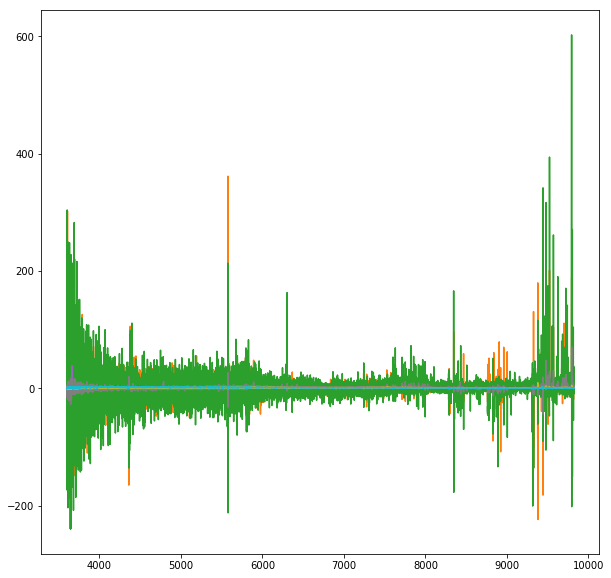

In [136]:
for i, x in enumerate(acoadds_flux[:10]): 
  pl.plot(wave, x / np.median(x))

##  Sort COADDS by TARGETID and keep those with NO FIBER REACH ERROR.

In [24]:
inds           = np.argsort(acoadds['TARGETID'])

In [25]:
acoadds        = acoadds[inds]
azbests        = azbests[inds]

In [26]:
assert  len(acoadds) == len(azbests)

In [27]:
len(acoadds['TARGETID'])

2500

In [28]:
in_coadd       = [x in acoadds['TARGETID'] for x in tids]

In [29]:
np.count_nonzero(in_coadd), np.count_nonzero(isgood[in_coadd])

(2500, 2117)

In [30]:
tids           =   tids[in_coadd]
isgood         = isgood[in_coadd]

In [31]:
len(tids), len(azbests), len(acoadds), np.count_nonzero(isgood)

(2500, 2500, 2500, 2117)

In [32]:
assert  np.all(tids == acoadds['TARGETID'])

##  Keep BGS targets only, distinguishing between MAIN_BRIGHT and SV0 

In [137]:
IS_MSV_BRIGHT  = (acoadds['CMX_TARGET'] & cmx_targetmask.cmx_mask.mask('MINI_SV_BGS_BRIGHT')) != 0
IS_SV0         = (acoadds['CMX_TARGET'] & cmx_targetmask.cmx_mask.mask('SV0_BGS')) != 0

IS_BGS         = IS_MSV_BRIGHT | IS_SV0 
IS_GOOD_BGS    = IS_BGS & isgood

IS_GOOD_BGS    = IS_GOOD_BGS.astype(bool)

IS_MSV_BRIGHT  = IS_MSV_BRIGHT[IS_GOOD_BGS]
IS_SV0         =        IS_SV0[IS_GOOD_BGS]

In [138]:
np.count_nonzero(IS_BGS), np.count_nonzero(IS_GOOD_BGS), np.count_nonzero(IS_MSV_BRIGHT), np.count_nonzero(IS_SV0)

(1484, 1260, 723, 1260)

In [139]:
IS_GOOD_BGS, len(IS_GOOD_BGS)

(array([False, False, False, ..., False, False, False]), 2500)

In [140]:
bgs_acoadds    = acoadds[IS_GOOD_BGS]
bgs_azbests    = azbests[IS_GOOD_BGS]

In [141]:
len(bgs_acoadds), len(bgs_azbests)

(1260, 1260)

In [142]:
bgs_azbests = Table(bgs_azbests)

bgs_azbests['IS_SV0'] = IS_SV0
bgs_azbests['IS_MSV_BRIGHT'] = IS_MSV_BRIGHT

In [143]:
len(bgs_azbests), np.count_nonzero(bgs_azbests['ZWARN'] > 0)

(1260, 85)

In [144]:
bgs_acoadds = Table(bgs_acoadds)

bgs_acoadds['IS_SV0'] = IS_SV0
bgs_acoadds['IS_MSV_BRIGHT'] = IS_MSV_BRIGHT

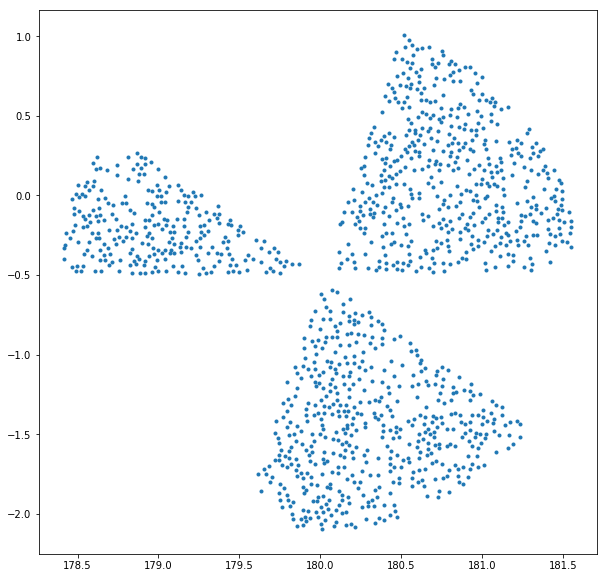

In [145]:
pl.plot(bgs_acoadds['TARGET_RA'], bgs_acoadds['TARGET_DEC'], '.')

##  Match to G12

In [146]:
# Matching
c              = SkyCoord(ra=bgs_acoadds['TARGET_RA']*u.degree, dec=bgs_acoadds['TARGET_DEC']*u.degree)
catalog        = SkyCoord(ra=G12['RA']*u.degree, dec=G12['DEC']*u.degree)

idx, d2d, d3d  = c.match_to_catalog_sky(catalog)

max_sep        = 1.0 * u.arcsec

sep_constraint = d2d < max_sep

c              = c[sep_constraint]

_matches       = catalog[idx[sep_constraint]]

coadd_matches  = bgs_acoadds[sep_constraint]
zbest_matches  = bgs_azbests[sep_constraint] 
gama_matches   =     G12[idx[sep_constraint]]

In [147]:
# zbest_matches

In [148]:
# Sanity check
dra, ddec     = c.spherical_offsets_to(_matches)

In [149]:
#dra.arcsec, ddec.arcsec

Text(0,0.5,'rr $z$')

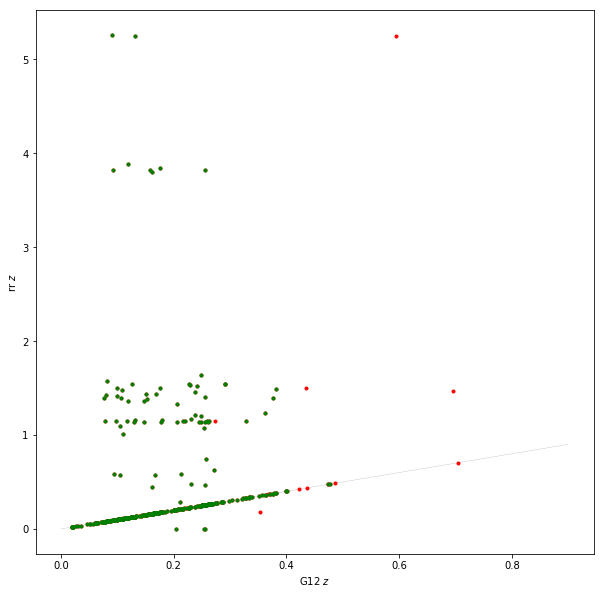

In [150]:
_ = np.arange(0.0, 1.0, 0.1)

pl.plot(_, _, 'k-', lw=0.1)

pl.plot(gama_matches['Z'][zbest_matches['IS_SV0'] == True], zbest_matches['Z'][zbest_matches['IS_SV0'] == True], '.', c='r')
pl.plot(gama_matches['Z'][zbest_matches['IS_MSV_BRIGHT'] == True],        zbest_matches['Z'][zbest_matches['IS_MSV_BRIGHT'] == True], '.', c='g')

pl.xlabel('G12 $z$')
pl.ylabel('rr $z$') 

In [151]:
line = (zbest_matches['Z'] > 0.5)

In [152]:
# pl.hist(zbest_matches['DELTACHI2'], bins=np.arange(0, 100, 20))
# pl.hist(zbest_matches[line]['DELTACHI2'], bins=np.arange(0, 100, 20))

In [153]:
# for x in coadd_matches.columns:
#    print(x)